In [56]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [78]:
df = pd.read_csv('/home/TE/Downloads/titanic.csv')
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [79]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)    
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_filtered


cdf = remove_outliers(df)

/tmp/ipykernel_4232/3428182669.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [80]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
cdf = cdf.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

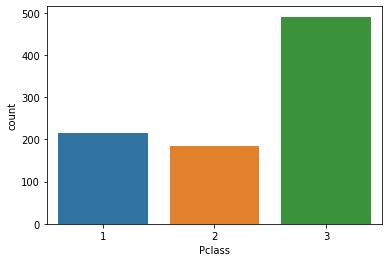

In [60]:
sns.countplot(x='Pclass', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

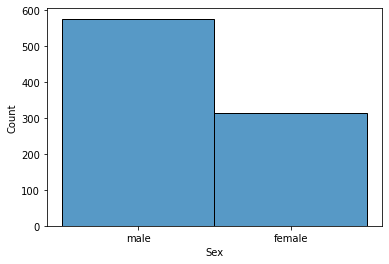

In [61]:
sns.histplot(data=df, x="Sex")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

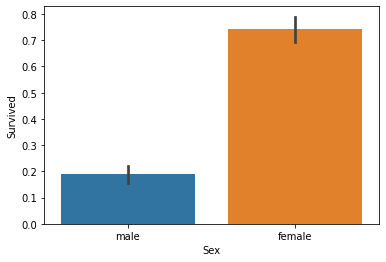

In [62]:
sns.barplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

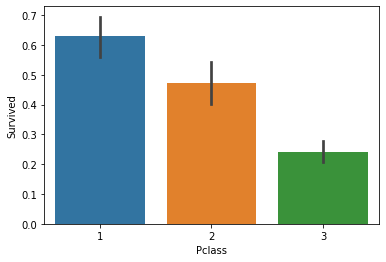

In [63]:
sns.barplot(x='Pclass', y='Survived', data=df)

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

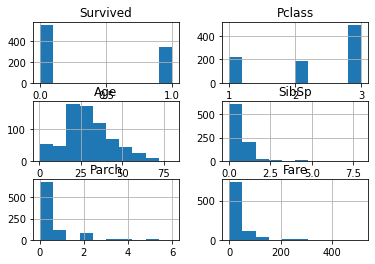

In [64]:
df.hist()

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

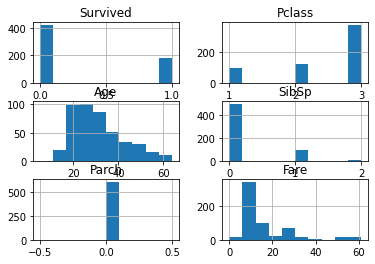

In [65]:
cdf.hist()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

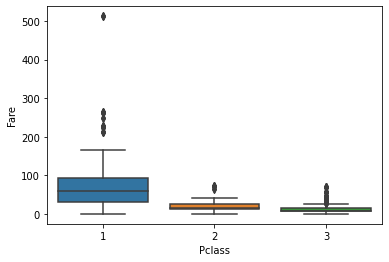

In [66]:
sns.boxplot(x='Pclass', y='Fare', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

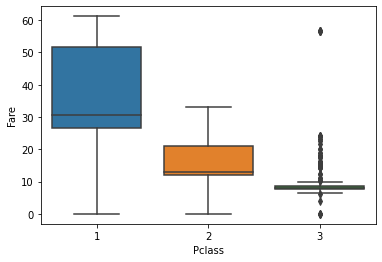

In [81]:
sns.boxplot(x='Pclass', y='Fare', data=cdf)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

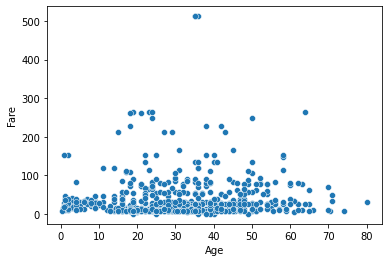

In [32]:
sns.scatterplot(x='Age', y='Fare', data=df)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

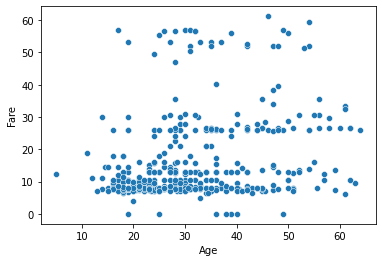

In [68]:
sns.scatterplot(x='Age', y='Fare', data=cdf)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

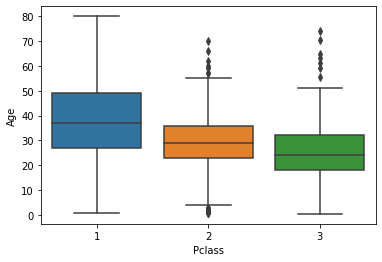

In [33]:
sns.boxplot(x='Pclass',y='Age',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

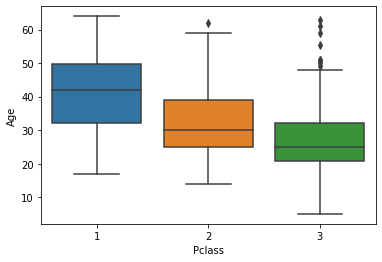

In [69]:
sns.boxplot(x='Pclass',y='Age',data=cdf)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

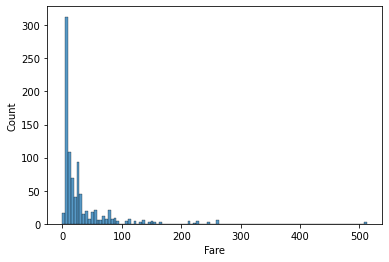

In [71]:
sns.histplot(x='Fare', data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

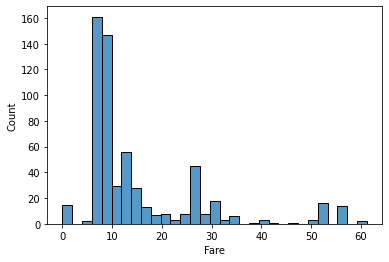

In [70]:
sns.histplot(x='Fare', data=cdf)

In [72]:
df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

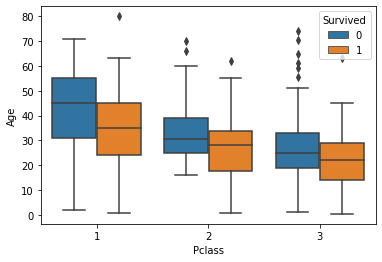

In [73]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

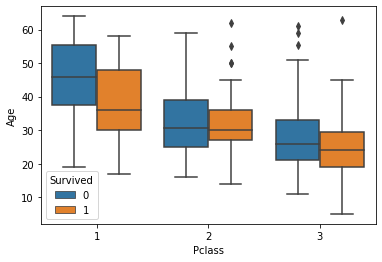

In [74]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=cdf)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

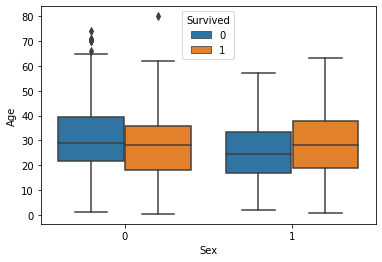

In [20]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

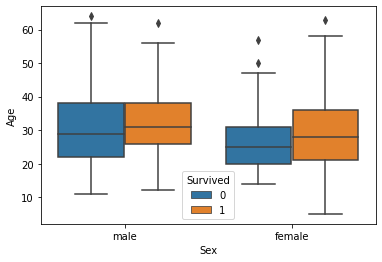

In [75]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=cdf)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

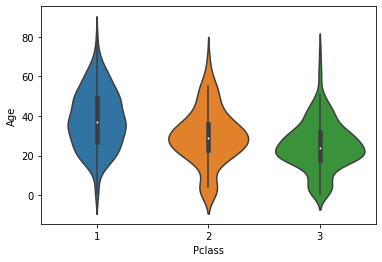

In [21]:
sns.violinplot(x='Pclass', y='Age', data=df)